In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# read data from csv file
filepath = './data/soldier_VS128/'

filename = 'P04_V1node_feature.csv'
data = pd.read_csv(filepath + filename)
# get column name
column_name = data.columns.values
column_name = [ 'occupancy_feature', 'in_FoV_feature',
       'occlusion_feature', 'coordinate_x', 'coordinate_y',
       'coordinate_z', 'distance', 'node_index']
# get the max value of each column
max_value = data.max()
# get the min value of each column
min_value = data.min()
print(max_value,min_value)


Unnamed: 0           69359.000000
occupancy_feature     1039.000000
in_FoV_feature           1.000000
occlusion_feature        1.000000
coordinate_x           325.000000
coordinate_y           960.000000
coordinate_z           463.000000
distance              1070.896773
node_index             239.000000
dtype: float64 Unnamed: 0             0.000000
occupancy_feature      0.000000
in_FoV_feature         0.000000
occlusion_feature      0.000000
coordinate_x        -187.000000
coordinate_y          64.000000
coordinate_z        -177.000000
distance              28.915848
node_index             0.000000
dtype: float64


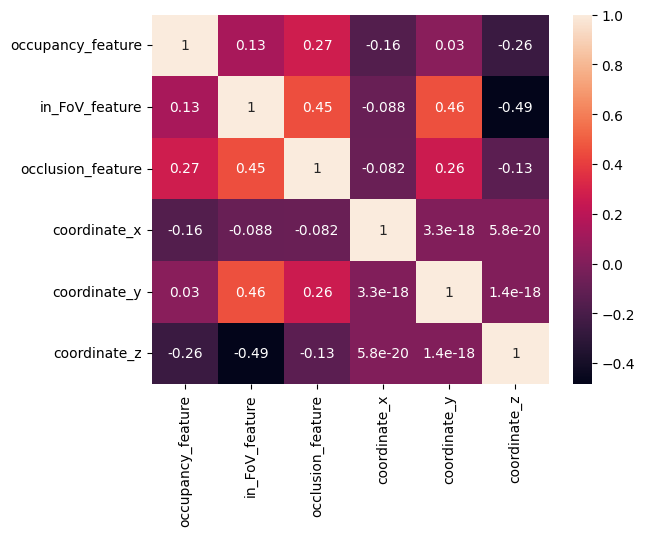

In [19]:
# check the coorelation between each feature
# correlation matrix
import seaborn as sns
data_feature = data[column_name[0:3]+column_name[6:7]]
data_feature = data[column_name[0:6]]
corr = data_feature.corr()
# plot the heatmap
plt.figure()
sns.heatmap(corr, annot=True)
plt.show()

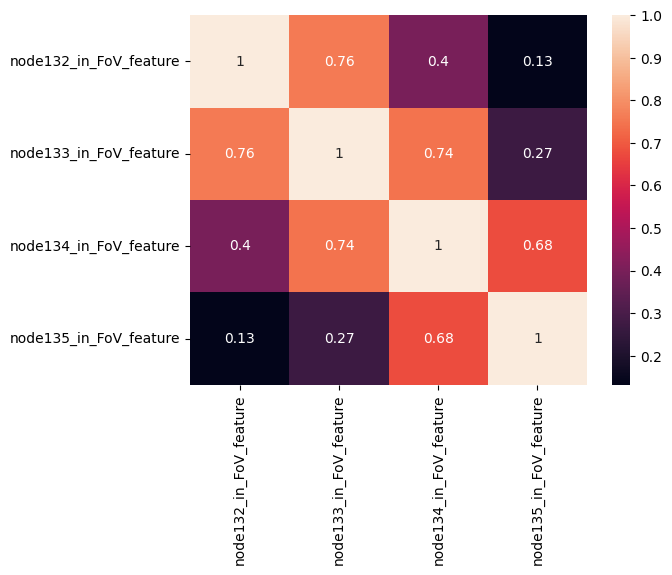

In [54]:
# check the feture coorelation between node_index==140 and node_index==141
node_indices = [139, 140, 141]
# node_indices = range(132, 136)
node_indices = range(36,40) #in-fov
node_indices = range(132,136) #occupancy
data_feature_nodes = []

for i, node_index in enumerate(node_indices):
    data_feature_node = data[data['node_index'] == node_index]
    data_feature_node = data_feature_node[column_name[1:2]]
    data_feature_node = data_feature_node.reset_index(drop=True).add_prefix(f'node{node_index}_')
    data_feature_nodes.append(data_feature_node)

data_feature_node = pd.concat(data_feature_nodes, axis=1)
corr = data_feature_node.corr()
corr
# plot the heatmap
plt.figure()
sns.heatmap(corr, annot=True)
plt.show()

# get visualization on frame with voxel grid

In [56]:
import open3d as o3d
from voxel_grid import visualize_voxel_grid, voxelizetion_para
image_width, image_height = np.array([1920, 1080])
# generate graph voxel grid features
voxel_size = int(64)
min_bounds = np.array([-251,    0, -241]) 
max_bounds = np.array([ 262, 1023,  511])

edge_prefix = str(voxel_size)
# get the graph max and min bounds
# graph_max_bound,graph_min_bound,graph_voxel_grid_integer_index_set,graph_voxel_grid_index_set,graph_voxel_grid_coords,original_index_to_integer_index = voxelizetion_para(
    # voxel_size=voxel_size, min_bounds=min_bounds, max_bounds=max_bounds)
results = voxelizetion_para(voxel_size=voxel_size, min_bounds=min_bounds, 
                            max_bounds=max_bounds)
graph_max_bound = results['graph_voxel_grid_max_bound']
graph_min_bound = results['graph_voxel_grid_min_bound']
graph_voxel_grid_integer_index_set = results['graph_voxel_grid_integer_index_set']
graph_voxel_grid_index_set = results['graph_voxel_grid_index_set']
graph_voxel_grid_coords = results['graph_voxel_grid_coords']
graph_voxel_grid_coords_array = results['graph_voxel_grid_coords_array']
original_index_to_integer_index = results['original_index_to_integer_index']

# get the point cloud data
pcd_clould_name = 'soldier'
trajectory_index = 0
pcd = get_pcd_data(point_cloud_name=pcd_name, trajectory_index=trajectory_index%150)
# visualize_voxel_grid(pcd,pcd_hpr,graph_min_bound,graph_max_bound,voxel_size,para_eye,graph_voxel_grid_integer_index_set,graph_voxel_grid_coords)


min_bounds: [-251    0 -241]
max_bounds: [ 262 1023  511]
graph max_bound: [ 324 1023  526]
graph min_bound: [-251    0 -241]
original_index_to_integer_index: {(0, 0, 0): 0, (0, 0, 1): 1, (0, 0, 2): 2, (0, 0, 3): 3, (0, 0, 4): 4, (0, 0, 5): 5, (0, 0, 6): 6, (0, 0, 7): 7, (0, 0, 8): 8, (0, 0, 9): 9, (0, 0, 10): 10, (0, 0, 11): 11, (0, 1, 0): 12, (0, 1, 1): 13, (0, 1, 2): 14, (0, 1, 3): 15, (0, 1, 4): 16, (0, 1, 5): 17, (0, 1, 6): 18, (0, 1, 7): 19, (0, 1, 8): 20, (0, 1, 9): 21, (0, 1, 10): 22, (0, 1, 11): 23, (0, 2, 0): 24, (0, 2, 1): 25, (0, 2, 2): 26, (0, 2, 3): 27, (0, 2, 4): 28, (0, 2, 5): 29, (0, 2, 6): 30, (0, 2, 7): 31, (0, 2, 8): 32, (0, 2, 9): 33, (0, 2, 10): 34, (0, 2, 11): 35, (0, 3, 0): 36, (0, 3, 1): 37, (0, 3, 2): 38, (0, 3, 3): 39, (0, 3, 4): 40, (0, 3, 5): 41, (0, 3, 6): 42, (0, 3, 7): 43, (0, 3, 8): 44, (0, 3, 9): 45, (0, 3, 10): 46, (0, 3, 11): 47, (0, 4, 0): 48, (0, 4, 1): 49, (0, 4, 2): 50, (0, 4, 3): 51, (0, 4, 4): 52, (0, 4, 5): 53, (0, 4, 6): 54, (0, 4, 7): 55, (0

In [3]:
# # check all P01_V1 to P27_V1
# for i in range(1,28):
#     filename = 'P' + str(i).zfill(2) + '_V1node_feature.csv'
#     data = pd.read_csv(filepath + filename)
#     # get the max value of each column
#     max_value = data.max()
#     # get the min value of each column
#     # min_value = data.min()
#     # print(max_value,min_value)
#     print(max_value)

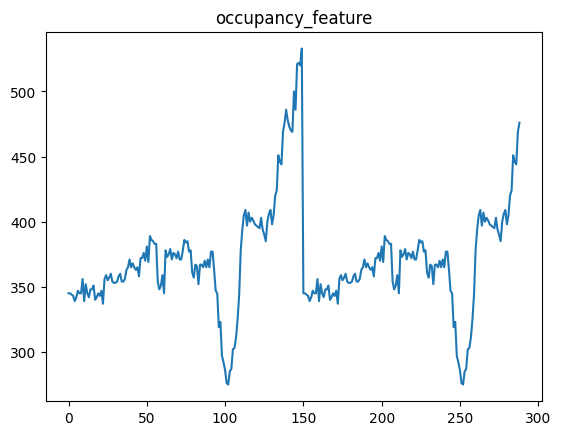

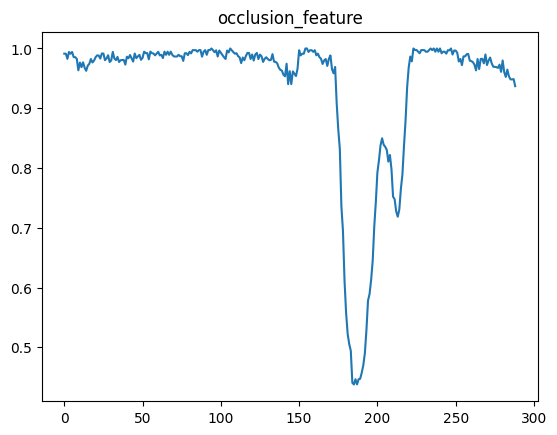

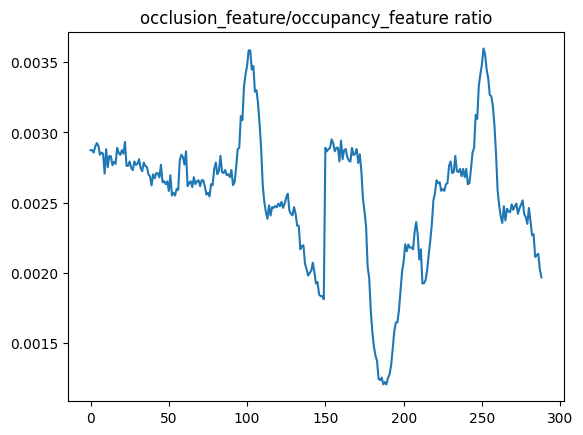

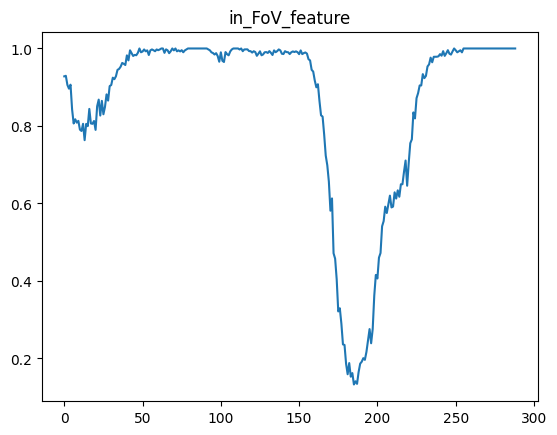

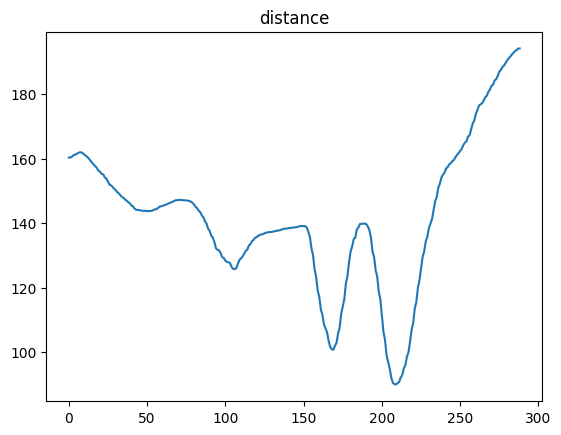

In [4]:

# data_numpy[:,0]
# get data when node_index == 134
# node_index_sample = 436 #infov
# node_index_sample = 820 #infov
node_index_sample = 140 #occlusion
# node_index_sample = 748

data_numpy = data[data['node_index'] == node_index_sample].values
# plot occupancy_feature
plt.figure()
plt.plot(data_numpy[:,1])
plt.title('occupancy_feature')
plt.show()

# plot occlusion_feature
plt.figure()
plt.plot(data_numpy[:,3])
plt.title('occlusion_feature')
plt.show()

# plot occupancy_feature/occlusion_feature ratio
plt.figure()
plt.plot(data_numpy[:,3]/data_numpy[:,1])
plt.title('occlusion_feature/occupancy_feature ratio')
plt.show()


# plot in_FoV_feature
plt.figure()
plt.plot(data_numpy[:,2])
plt.title('in_FoV_feature')
plt.show()

# plot distance
plt.figure()
plt.plot(data_numpy[:,7])
plt.title('distance')
plt.show()





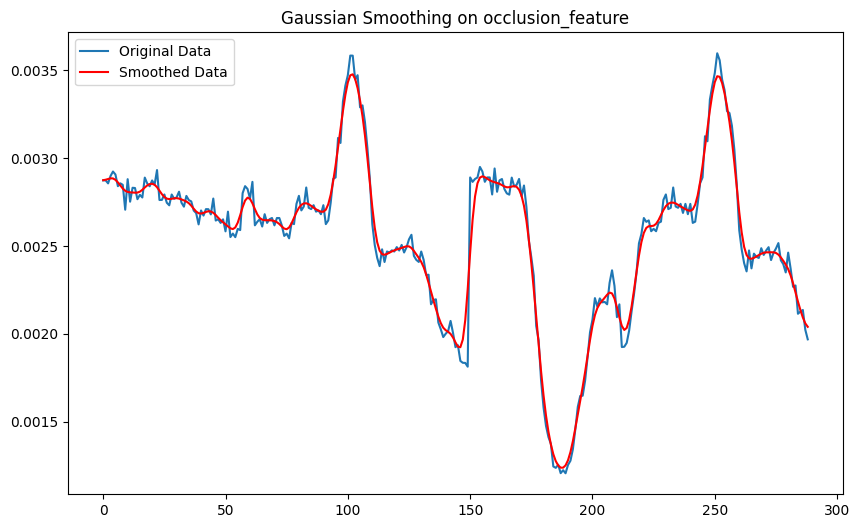

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Example data (could be any one-dimensional array)
# data = np.random.randn(100).cumsum()
occlusion = data_numpy[:,3]
ratio = data_numpy[:,3]/data_numpy[:,1]
occlusion = ratio

# Apply Gaussian smoothing
smoothed_data = gaussian_filter(occlusion, sigma=2)

# Plotting original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(occlusion, label='Original Data')
plt.plot(smoothed_data, color='red', label='Smoothed Data')
plt.title('Gaussian Smoothing on occlusion_feature')
plt.legend()
plt.show()


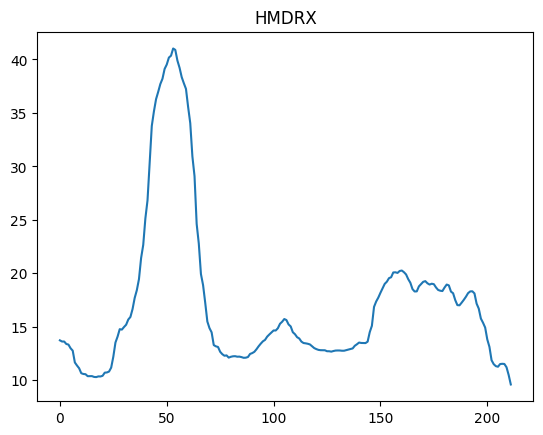

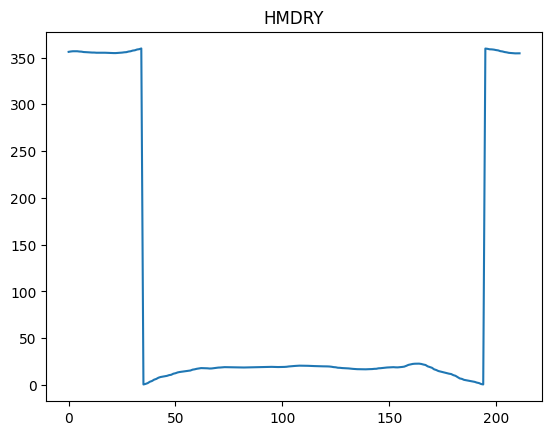

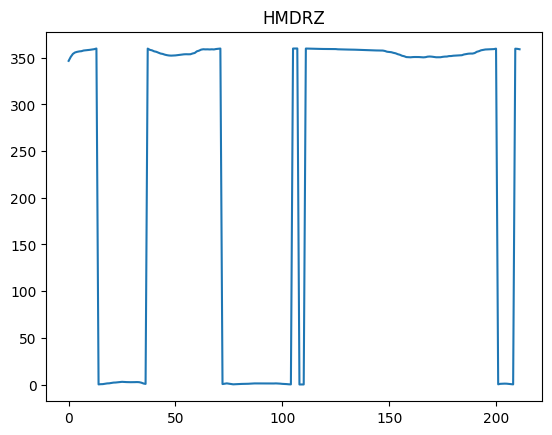

In [6]:
# read trajectory data
trajectory_filepath = '../point_cloud_data/6DoF-HMD-UserNavigationData-master/NavigationData/'
trajectory_filename = 'H4_nav.csv'
trajectory_data = pd.read_csv(trajectory_filepath + trajectory_filename)
# get column name
trajectory_column_name = trajectory_data.columns.values
# FrameNumber,HMDPX,HMDPY,HMDPZ,HMDRX,HMDRY,HMDRZ,Participant,Dataset,ViewFrame
# get Participant==P01_V1
trajectory_data = trajectory_data[trajectory_data['Participant'] == 'P01_V1']
# plot HMDPX,HMDPY,HMDPZ,HMDRX,HMDRY,HMDRZ
# plt.figure()
# plt.plot(trajectory_data['HMDPX'])
# plt.title('HMDPX')
# plt.show()
# # plot HMDPY
# plt.figure()
# plt.plot(trajectory_data['HMDPY'])
# plt.title('HMDPY')
# plt.show()
# # plot HMDPZ
# plt.figure()
# plt.plot(trajectory_data['HMDPZ'])
# plt.title('HMDPZ')
# plt.show()
# plot HMDRX
plt.figure()
plt.plot(trajectory_data['HMDRX'])
plt.title('HMDRX')
plt.show()
# plot HMDRY
plt.figure()
plt.plot(trajectory_data['HMDRY'])
plt.title('HMDRY')
plt.show()
# plot HMDRZ
plt.figure()
plt.plot(trajectory_data['HMDRZ'])
plt.title('HMDRZ')
plt.show()





In [7]:
# 
import numpy as np
import matplotlib.pyplot as plt

ground_true = np.array([[0.9957, 0.3427, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9576],
        [0.1816, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.8166, 0.0276],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.6452, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.3775, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9764, 0.1446, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8037, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.8594],
        [0.9955, 0.2941, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9072],
        [0.1111, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.7835, 0.0147],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4906, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9952, 0.2963, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9069, 0.1355, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.7654, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9821, 0.1834, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.8840],
        [0.0485, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.6422, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4179, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9785, 0.2143, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8835, 0.0632, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.6806, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9462, 0.1281, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7729],
        [0.0297, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5851, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9954, 0.3467, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9549, 0.1351, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8322, 0.0526, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.6331, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9977],
        [0.8961, 0.0788, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7511],
        [0.0099, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.4863, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9925, 0.2589, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9165, 0.0942, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.7671, 0.0121, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.4567, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.5686]],)
pred_graph = np.array([[0.7910, 0.6015, 0.3190, 0.1215, 0.0839, 0.0701, 0.8314, 0.7274],
        [0.3954, 0.1611, 0.0952, 0.0790, 0.8844, 0.8440, 0.6185, 0.2845],
        [0.1283, 0.0966, 0.9159, 0.8999, 0.8035, 0.5335, 0.2372, 0.1306],
        [0.9376, 0.9305, 0.8985, 0.7636, 0.4780, 0.2546, 0.9486, 0.9513],
        [0.9383, 0.8883, 0.7588, 0.5834, 0.9588, 0.9589, 0.9482, 0.9325],
        [0.8895, 0.8282, 0.9627, 0.9607, 0.9556, 0.9439, 0.9239, 0.8797],
        [0.7981, 0.6281, 0.3321, 0.1139, 0.0802, 0.0674, 0.8388, 0.7387],
        [0.3883, 0.1512, 0.0897, 0.0747, 0.8900, 0.8624, 0.6161, 0.2659],
        [0.1167, 0.0898, 0.9204, 0.9111, 0.8191, 0.4961, 0.2190, 0.1212],
        [0.9431, 0.9358, 0.9109, 0.7840, 0.4646, 0.2409, 0.9537, 0.9505],
        [0.9455, 0.9018, 0.7596, 0.5645, 0.9613, 0.9623, 0.9561, 0.9342],
        [0.8916, 0.8344, 0.9644, 0.9639, 0.9615, 0.9449, 0.9236, 0.8977],
        [0.7996, 0.6107, 0.3173, 0.1052, 0.0709, 0.0585, 0.8437, 0.7279],
        [0.4033, 0.1396, 0.0800, 0.0652, 0.8943, 0.8524, 0.6363, 0.2446],
        [0.0992, 0.0756, 0.9246, 0.9130, 0.8439, 0.5102, 0.1873, 0.1057],
        [0.9443, 0.9404, 0.9202, 0.7712, 0.4128, 0.2053, 0.9568, 0.9547],
        [0.9469, 0.9057, 0.7464, 0.5172, 0.9623, 0.9633, 0.9598, 0.9438],
        [0.8898, 0.8238, 0.9653, 0.9650, 0.9628, 0.9469, 0.9213, 0.8928],
        [0.7889, 0.5927, 0.2902, 0.0988, 0.0658, 0.0531, 0.8464, 0.7209],
        [0.3801, 0.1280, 0.0730, 0.0585, 0.8960, 0.8457, 0.5843, 0.2236],
        [0.0870, 0.0669, 0.9256, 0.9065, 0.8030, 0.4442, 0.1639, 0.0929],
        [0.9474, 0.9388, 0.9065, 0.7346, 0.3955, 0.1893, 0.9598, 0.9542],
        [0.9442, 0.8988, 0.7400, 0.4824, 0.9660, 0.9630, 0.9586, 0.9429],
        [0.8825, 0.8016, 0.9686, 0.9660, 0.9592, 0.9460, 0.9154, 0.8820],
        [0.7748, 0.5760, 0.2630, 0.0962, 0.0617, 0.0484, 0.8462, 0.7050],
        [0.3622, 0.1201, 0.0689, 0.0538, 0.8936, 0.8354, 0.5750, 0.2141],
        [0.0803, 0.0614, 0.9260, 0.9063, 0.7911, 0.4334, 0.1490, 0.0870],
        [0.9491, 0.9391, 0.9039, 0.7293, 0.3637, 0.1758, 0.9610, 0.9555],
        [0.9418, 0.8838, 0.7211, 0.4437, 0.9671, 0.9638, 0.9553, 0.9343],
        [0.8756, 0.7591, 0.9694, 0.9667, 0.9599, 0.9458, 0.9117, 0.8377]])
pred_TLR = np.array([[1.0000, 1.0000, 0.6105, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9705, 0.1024, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5501],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.9627, 0.0804, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.5579, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9443, 0.0807, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.2429, 1.0000, 1.0000, 1.0000, 1.0000, 0.9120, 0.0413],
        [1.0000, 1.0000, 0.4830, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.9367, 0.0449, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4439],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8986, 0.0336, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.3953, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9039, 0.0204, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.3718, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.3475],
        [1.0000, 1.0000, 0.3519, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.8248, 0.0119, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.3089],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7877, 0.0023, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.2644, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8022, 0.0048, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.2619, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6329],
        [1.0000, 0.9928, 0.2368, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.6968, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9955, 0.1940],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.6734, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9796, 0.1746, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.6667, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9825, 0.1410, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.5305],
        [1.0000, 0.9723, 0.1018, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.5234, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9333, 0.0858],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5569, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9624, 0.0961, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.5262, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.9225, 0.0647, 1.0000, 1.0000, 1.0000, 1.0000, 0.9284, 0.1397]])

In [8]:
pred_graph = np.array([[0.6456, 0.4681, 0.2482, 0.1153, 0.0827, 0.0665, 0.7094, 0.5975],
        [0.3305, 0.1315, 0.0904, 0.0733, 0.8146, 0.7389, 0.4995, 0.2002],
        [0.1049, 0.0863, 0.8924, 0.8592, 0.7109, 0.4114, 0.1630, 0.1100],
        [0.9255, 0.9193, 0.8522, 0.6630, 0.3611, 0.1913, 0.9468, 0.9479],
        [0.9278, 0.8140, 0.6398, 0.4012, 0.9575, 0.9570, 0.9438, 0.8992],
        [0.8046, 0.6986, 0.9614, 0.9579, 0.9504, 0.9154, 0.8477, 0.7476],
        [0.6325, 0.4636, 0.2299, 0.1111, 0.0795, 0.0647, 0.7053, 0.5926],
        [0.3191, 0.1275, 0.0870, 0.0701, 0.8080, 0.7515, 0.5067, 0.2032],
        [0.1045, 0.0839, 0.8936, 0.8673, 0.7242, 0.4336, 0.1618, 0.1080],
        [0.9312, 0.9242, 0.8619, 0.7011, 0.3555, 0.1840, 0.9514, 0.9470],
        [0.9339, 0.8405, 0.6309, 0.3703, 0.9617, 0.9614, 0.9519, 0.9007],
        [0.7974, 0.6818, 0.9659, 0.9638, 0.9579, 0.9192, 0.8477, 0.7787],
        [0.6070, 0.4162, 0.2121, 0.1047, 0.0775, 0.0654, 0.6775, 0.5450],
        [0.3032, 0.1178, 0.0822, 0.0676, 0.7814, 0.7055, 0.4895, 0.1990],
        [0.1002, 0.0808, 0.8918, 0.8561, 0.7251, 0.4269, 0.1557, 0.1028],
        [0.9332, 0.9284, 0.8569, 0.6990, 0.3383, 0.1854, 0.9532, 0.9502],
        [0.9280, 0.8438, 0.6135, 0.3527, 0.9626, 0.9618, 0.9537, 0.9140],
        [0.7957, 0.6491, 0.9669, 0.9643, 0.9583, 0.9257, 0.8530, 0.7703],
        [0.5758, 0.3910, 0.1964, 0.1010, 0.0735, 0.0617, 0.6667, 0.5135],
        [0.2766, 0.1147, 0.0791, 0.0646, 0.7713, 0.6818, 0.4351, 0.1947],
        [0.0965, 0.0773, 0.8810, 0.8262, 0.6614, 0.3814, 0.1476, 0.0997],
        [0.9363, 0.9236, 0.8245, 0.6385, 0.3120, 0.1712, 0.9548, 0.9485],
        [0.9187, 0.8303, 0.5885, 0.3252, 0.9648, 0.9616, 0.9512, 0.9066],
        [0.7761, 0.6058, 0.9684, 0.9652, 0.9541, 0.9285, 0.8521, 0.7686],
        [0.5658, 0.3777, 0.1796, 0.0989, 0.0726, 0.0615, 0.6553, 0.4884],
        [0.2494, 0.1103, 0.0771, 0.0640, 0.7575, 0.6542, 0.4024, 0.1824],
        [0.0921, 0.0753, 0.8781, 0.8092, 0.6327, 0.3565, 0.1374, 0.0968],
        [0.9391, 0.9203, 0.8098, 0.6161, 0.2905, 0.1680, 0.9553, 0.9482],
        [0.9019, 0.7979, 0.5702, 0.3152, 0.9644, 0.9606, 0.9452, 0.8950],
        [0.7733, 0.5670, 0.9664, 0.9634, 0.9534, 0.9300, 0.8554, 0.6985]])
ground_true = np.array([[1.0000, 0.7377, 0.0056, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.4382, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9615, 0.1837],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.8065, 0.0281, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.5070, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9927, 0.2755, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8660, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.8635],
        [1.0000, 0.6880, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000],
        [0.3584, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9493, 0.1274],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7900, 0.0118, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.4804, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9816, 0.2592, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8453, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9951],
        [0.3190, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9178, 0.1016],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.7245, 0.0046, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.4101, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9642, 0.1580, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.8113, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.5428, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9951],
        [0.2524, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9038, 0.0623],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.6576, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 0.3095, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9201, 0.1174, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.7541, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9977],
        [1.0000, 0.4527, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9743],
        [0.2058, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.8406, 0.0571],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.5757, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9929, 0.3341, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8859, 0.0787, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.5520, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.6270]])
pred_TLR = np.array([[0.9501, 0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.8714],
        [0.0448, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.6690, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 0.4505, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9848, 0.2233, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.9185, 0.1292, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.7222, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.8081],
        [0.8853, 0.0905, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.7590],
        [0.0174, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.5809, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9976, 0.3490, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.9472, 0.1555, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8663, 0.0619, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.7147, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9977],
        [0.8781, 0.0576, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.6705],
        [0.0071, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.4352, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9877, 0.2657, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.8901, 0.0850, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8063, 0.0189, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.5427, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [0.7960, 0.0248, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5484],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9955, 0.3508, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.9490, 0.1730, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.8524, 0.0697, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.6860, 0.0049, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.4673, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9684],
        [0.6964, 0.0046, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5049],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9853, 0.2569, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.8915, 0.1214, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.8123, 0.0389, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.6168, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 0.2700, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.3835]])

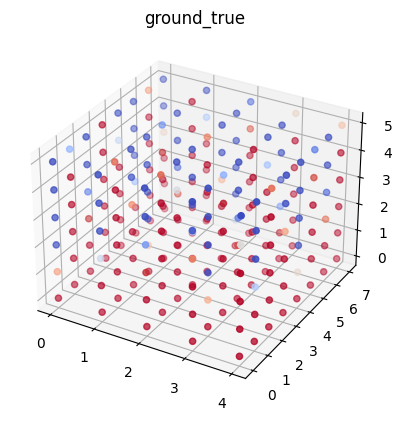

In [9]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# visualizee ground_true and pred_graph in 3D grid with size as 5*8*6
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 5, 1)
y = np.arange(0, 8, 1)
z = np.arange(0, 6, 1)
X, Y, Z = np.meshgrid(x, y, z)
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=ground_true.flatten(), cmap='coolwarm')
plt.title('ground_true')
plt.show()


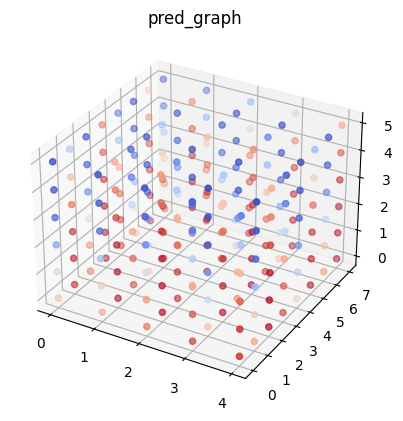

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=ground_true.flatten(), cmap='coolwarm')
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=pred_graph.flatten(), cmap='coolwarm')
plt.title('pred_graph')
plt.show()

Text(0.5, 0.92, 'pred_TLR')

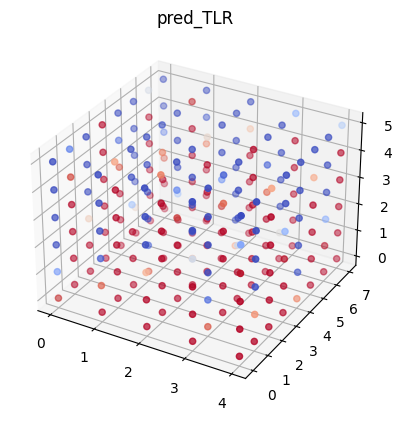

In [11]:
# pred_TLR
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 5, 1)
y = np.arange(0, 8, 1)
z = np.arange(0, 6, 1)
X, Y, Z = np.meshgrid(x, y, z)
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=pred_TLR.flatten(), cmap='coolwarm')
plt.title('pred_TLR')

In [12]:
gt = ground_true.reshape(5,6,8)

In [15]:
import open3d as o3d
# visualize ground_true in 3D grid with size as 5*6*8
voxel_size = 0.1
mesh = o3d.geometry.TriangleMesh.create_coordinate_frame(size=1, origin=[0, 0, 0])
o3d.visualization.draw_geometries([mesh])
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(o3d.geometry.PointCloud(gt), voxel_size)
o3d.visualization.draw_geometries([voxel_grid])


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. open3d.cpu.pybind.geometry.PointCloud()
    2. open3d.cpu.pybind.geometry.PointCloud(arg0: open3d.cpu.pybind.geometry.PointCloud)
    3. open3d.cpu.pybind.geometry.PointCloud(points: open3d.cpu.pybind.utility.Vector3dVector)

Invoked with: array([[[1.    , 0.7377, 0.0056, 0.    , 0.    , 0.    , 1.    , 1.    ],
        [0.4382, 0.    , 0.    , 0.    , 1.    , 1.    , 0.9615, 0.1837],
        [0.    , 0.    , 1.    , 1.    , 1.    , 0.8065, 0.0281, 0.    ],
        [1.    , 1.    , 1.    , 1.    , 0.507 , 0.    , 1.    , 1.    ],
        [1.    , 1.    , 0.9927, 0.2755, 1.    , 1.    , 1.    , 1.    ],
        [1.    , 0.866 , 1.    , 1.    , 1.    , 1.    , 1.    , 0.8635]],

       [[1.    , 0.688 , 0.    , 0.    , 0.    , 0.    , 1.    , 1.    ],
        [0.3584, 0.    , 0.    , 0.    , 1.    , 1.    , 0.9493, 0.1274],
        [0.    , 0.    , 1.    , 1.    , 1.    , 0.79  , 0.0118, 0.    ],
        [1.    , 1.    , 1.    , 1.    , 0.4804, 0.    , 1.    , 1.    ],
        [1.    , 1.    , 0.9816, 0.2592, 1.    , 1.    , 1.    , 1.    ],
        [1.    , 0.8453, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ]],

       [[1.    , 0.6266, 0.    , 0.    , 0.    , 0.    , 1.    , 0.9951],
        [0.319 , 0.    , 0.    , 0.    , 1.    , 1.    , 0.9178, 0.1016],
        [0.    , 0.    , 1.    , 1.    , 1.    , 0.7245, 0.0046, 0.    ],
        [1.    , 1.    , 1.    , 1.    , 0.4101, 0.    , 1.    , 1.    ],
        [1.    , 1.    , 0.9642, 0.158 , 1.    , 1.    , 1.    , 1.    ],
        [1.    , 0.8113, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ]],

       [[1.    , 0.5428, 0.    , 0.    , 0.    , 0.    , 1.    , 0.9951],
        [0.2524, 0.    , 0.    , 0.    , 1.    , 1.    , 0.9038, 0.0623],
        [0.    , 0.    , 1.    , 1.    , 1.    , 0.6576, 0.    , 0.    ],
        [1.    , 1.    , 1.    , 1.    , 0.3095, 0.    , 1.    , 1.    ],
        [1.    , 1.    , 0.9201, 0.1174, 1.    , 1.    , 1.    , 1.    ],
        [1.    , 0.7541, 1.    , 1.    , 1.    , 1.    , 1.    , 0.9977]],

       [[1.    , 0.4527, 0.    , 0.    , 0.    , 0.    , 1.    , 0.9743],
        [0.2058, 0.    , 0.    , 0.    , 1.    , 1.    , 0.8406, 0.0571],
        [0.    , 0.    , 1.    , 1.    , 1.    , 0.5757, 0.    , 0.    ],
        [1.    , 1.    , 1.    , 0.9929, 0.3341, 0.    , 1.    , 1.    ],
        [1.    , 1.    , 0.8859, 0.0787, 1.    , 1.    , 1.    , 1.    ],
        [1.    , 0.552 , 1.    , 1.    , 1.    , 1.    , 1.    , 0.627 ]]])

: 